In [18]:
import cv2
import numpy as np
def linear_to_db(snr_linear):
    return 10.0 * np.log10(snr_linear + 1e-12)
# SNR
def compute_snr(image, mask=None):
    """
    计算图像或区域的 SNR
    - image: 灰度图 (2D NumPy 数组)
    - mask: 可选布尔掩膜，选择“信号区域”；若为 None，则在整个图像区域计算
    返回 SNR 值
    """
    if mask is None:
        region = image
    else:
        region = image[mask]

    mu = np.mean(region)
    sigma = np.std(region)
    snr = mu / (sigma + 1e-8)
    return snr

# 示例
img = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
# 假设图像中心 100×100 区域为信号区域
mask = np.zeros_like(img, dtype=bool)
mask[0:h ,0:w] = True

snr_value = compute_snr(img, mask)
print("SNR =", linear_to_db(snr_value))

img = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
# 假设图像中心 100×100 区域为信号区域
mask = np.zeros_like(img, dtype=bool)
mask[0:h ,0:w] = True

snr_value = compute_snr(img, mask)
print("SNR =", linear_to_db(snr_value))


SNR = 4.400052132716267
SNR = 4.583794225170749


In [17]:
import cv2
import numpy as np

def compute_snr(image, mask=None):
    """
    计算图像的 SNR（灰度图）
    """
    if mask is None:
        region = image
    else:
        region = image[mask]

    mu = np.mean(region)
    sigma = np.std(region)
    snr = mu / (sigma + 1e-8)
    return snr
# 将线性 SNR 转为 dB
def linear_to_db(snr_linear):
    return 10.0 * np.log10(snr_linear + 1e-12)
def adjust_brightness_rgb(image, factor):
    """
    对 RGB 图像整体调整亮度
    """
    return np.clip(image.astype(np.float32) * factor, 0, 255).astype(np.uint8)

# === 处理图像 86.jpg：降低亮度 ===
img1_rgb = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86.jpg")  # RGB (BGR actually)

# 调整亮度
img1_darker = adjust_brightness_rgb(img1_rgb, 0.3)

# 保存修改后的图像
cv2.imwrite("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86_darker_rgb.jpg", img1_darker)

# 转为灰度图用于 SNR 计算
img1_gray = cv2.cvtColor(img1_darker, cv2.COLOR_BGR2GRAY)
snr1 = compute_snr(img1_gray)
print("图像 86（降低亮度后）SNR =", linear_to_db(snr1))

# === 处理图像 255.jpg：提高亮度 ===
img2_rgb = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg")

img2_brighter = adjust_brightness_rgb(img2_rgb, 1.8)
cv2.imwrite("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255_brighter_rgb.jpg", img2_brighter)

img2_gray = cv2.cvtColor(img2_brighter, cv2.COLOR_BGR2GRAY)
snr2 = compute_snr(img2_gray)
print("图像 255（提高亮度后）SNR =", linear_to_db(snr2))


图像 86（降低亮度后）SNR = 4.310965336587853
图像 255（提高亮度后）SNR = 5.154478511423655


In [16]:

import cv2
import numpy as np

def compute_snr(image, mask=None):
    """
    计算图像的 SNR（灰度图）
    """
    if mask is None:
        region = image
    else:
        region = image[mask]

    mu = np.mean(region)
    sigma = np.std(region)
    snr = mu / (sigma + 1e-8)
    return snr

def adjust_brightness_rgb(image, factor):
    """
    对 RGB 图像整体调整亮度
    """
    return np.clip(image.astype(np.float32) * factor, 0, 255).astype(np.uint8)


# === 处理图像 255.jpg：提高亮度 ===
img1_rgb = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg")



img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_BGR2GRAY)
snr1 = compute_snr(img1_gray)
print("图像 255（提高亮度后）SNR =", snr1)

# === 处理图像 255.jpg：提高亮度 ===
img2_rgb = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg")
blurred = cv2.GaussianBlur(img2_rgb, (11, 11), 0)
cv2.imwrite("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255_blurred_rgb.jpg", blurred)
img2_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
snr2 = compute_snr(img2_gray)
print("图像 255（提高亮度后）SNR =", snr2)




图像 255（提高亮度后）SNR = 2.8733473527596294
图像 255（提高亮度后）SNR = 3.036818720578929


In [4]:
import cv2
import numpy as np

# SNR（线性）计算
def compute_snr(image, mask=None):
    """
    计算图像或区域的线性 SNR：
    - image: 灰度图 (NumPy 2D 数组)
    - mask: 可选布尔掩膜，指定信号区域；若为 None，则使用全图
    返回线性 SNR 值
    """
    region = image if mask is None else image[mask]
    mu = np.mean(region)
    sigma = np.std(region)
    snr_linear = mu / (sigma + 1e-8)
    return snr_linear

# 将线性 SNR 转为 dB
def linear_to_db(snr_linear):
    # SNR(dB) = 10 * log10(SNR_linear)
    return 10.0 * np.log10(snr_linear + 1e-12)

# 示例
for path, mask_slice in [
    ("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86.jpg", (slice(0,h), slice(0,w))),
    ("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg", (slice(0,h), slice(0, w)))
]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img, dtype=bool)
    mask[mask_slice] = True

    snr_linear = compute_snr(img, mask)
    snr_db = linear_to_db(snr_linear)

    print(f"图片：{path.split('/')[-1]}")
    print(f"  线性 SNR = {snr_linear:.3f}")
    print(f"  SNR (dB)  = {snr_db:.2f} dB")


图片：86.jpg
  线性 SNR = 2.754
  SNR (dB)  = 4.40 dB
图片：255.jpg
  线性 SNR = 2.873
  SNR (dB)  = 4.58 dB


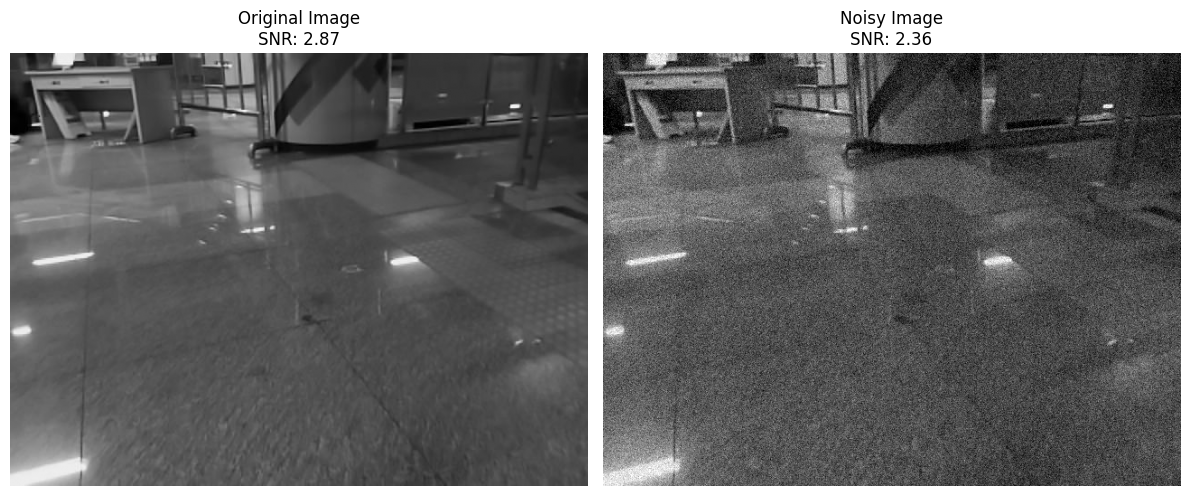

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_snr(image):
    """计算图像的 SNR"""
    signal_mean = np.mean(image)
    signal_std = np.std(image)
    snr = signal_mean / (signal_std + 1e-8)
    return snr

# 读取图像
image_path = '/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg'  # 请替换为您的图像路径
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 计算原始图像的 SNR
original_snr = compute_snr(image)

# 向图像添加高斯噪声
noise_std = 20  # 噪声标准差，您可以调整此值以控制噪声强度
noise = np.random.normal(0, noise_std, image.shape)
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

# 计算加噪声图像的 SNR
noisy_snr = compute_snr(noisy_image)

# 可视化原始图像和加噪声图像
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Original Image\nSNR: {original_snr:.2f}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image\nSNR: {noisy_snr:.2f}')
plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
import cv2
import numpy as np

# CNR
def compute_cnr(image, mask_A, mask_B):
    """
    计算图像的 CNR
    - mask_A: 目标区域布尔掩膜
    - mask_B: 背景区域布尔掩膜
    返回 CNR
    """
    A = image[mask_A]
    B = image[mask_B]

    muA = np.mean(A)
    muB = np.mean(B)
    sigmaB = np.std(B)

    cnr = abs(muA - muB) / (sigmaB + 1e-8)
    return cnr


# 示例
img = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
# 假设图像中心 100×100 区域为信号区域
mask = np.zeros_like(img, dtype=bool)
# 示例
# 定义两个区域
mask_A = np.zeros_like(img, dtype=bool)
mask_B = np.zeros_like(img, dtype=bool)
mask_A[100:200, 100:200] = True    # 目标区域
mask_B[0:h, 0:w] = True    # 背景区域

cnr_value = compute_cnr(img, mask_A, mask_B)
print("CNR =", cnr_value)

# 示例
img = cv2.imread("/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
# 假设图像中心 100×100 区域为信号区域
mask = np.zeros_like(img, dtype=bool)
# 示例
# 定义两个区域
mask_A = np.zeros_like(img, dtype=bool)
mask_B = np.zeros_like(img, dtype=bool)
mask_A[100:200, 100:200] = True    # 目标区域
mask_B[0:h, 0:w] = True    # 背景区域

cnr_value = compute_cnr(img, mask_A, mask_B)
print("CNR =", cnr_value)

CNR = 0.9979447605722636
CNR = 0.7803751379272402


In [3]:
import torch
from piq import brisque
from PIL import Image
import torchvision.transforms as T

# 图像预处理（转为 Tensor 并 resize）
transform = T.Compose([
    T.Resize((512, 512)),   # 可按需要调整
    T.ToTensor()
])

# 加载图像
image = Image.open('/home/ubuntu/Desktop/project/sensor-calibration/notebooks/86.jpg').convert('RGB')
img_tensor = transform(image).unsqueeze(0)  # [1, 3, H, W]，添加 batch 维度

# 计算 BRISQUE 分数（值越小，图像质量越高）
with torch.no_grad():
    score = brisque(img_tensor, data_range=1.0)
print(f"BRISQUE score: {score.item():.2f}")
# 加载图像
image = Image.open('/home/ubuntu/Desktop/project/sensor-calibration/notebooks/255.jpg').convert('RGB')
img_tensor = transform(image).unsqueeze(0)  # [1, 3, H, W]，添加 batch 维度

# 计算 BRISQUE 分数（值越小，图像质量越高）
with torch.no_grad():
    score = brisque(img_tensor, data_range=1.0)
print(f"BRISQUE score: {score.item():.2f}")


BRISQUE score: 57.07
BRISQUE score: 45.09
